In [102]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()
warnings.filterwarnings('ignore')

In [2]:
company = pd.read_csv("companies.csv")
company

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,c:99940,196548,Company,99940,NaN,Webgility,webgility,/company/webgility,ecommerce,operating,...,2013-08-12,2013-08-12,2.0,5.0,NaN,2011-09-06 23:17:56,2013-08-13 00:39:13,37.774929,-122.419415,NaN
196549,c:9995,196549,Company,9995,NaN,FohBoh,fohboh,/company/fohboh,public_relations,operating,...,2013-05-01,2013-05-01,1.0,14.0,NaN,2008-08-24 15:46:26,2013-06-28 20:55:30,37.338208,-121.886329,NaN
196550,c:9996,196550,Company,9996,NaN,CSC,csc,/company/csc,consulting,operating,...,2012-01-01,2013-10-30,3.0,44.0,NaN,2008-08-24 15:46:58,2013-06-28 20:52:01,38.882334,-77.171091,NaN
196551,c:9997,196551,Company,9997,NaN,Top-candidate,top candidate,/company/top-candidate,search,operating,...,NaN,NaN,NaN,1.0,NaN,2008-08-24 16:00:22,2013-06-28 20:56:44,34.052234,-118.243685,NaN


In [3]:
company.shape

(196553, 44)

In [5]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196531 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  logo_url         

In [6]:
df = company

In [8]:
df.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


In [9]:
# dropping unnecessary columns

company.drop(['region','city','state_code','domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink','domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies'], axis=1,inplace=True)


In [10]:
company.duplicated().sum()
# checking duplicates

0

In [12]:
company.drop(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at'], axis=1,inplace=True)
# dropping columns

KeyError: "['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at'] not found in axis"

In [13]:
# checking null values
df.isnull().sum()

category_code           73367
status                      0
founded_at             105326
closed_at              193933
country_code           108563
first_investment_at    193970
last_investment_at     193970
investment_rounds      193962
first_funding_at       165046
last_funding_at        165046
funding_rounds         164846
funding_total_usd      168679
first_milestone_at     104854
last_milestone_at      104854
milestones             104854
relationships           66886
lat                    112701
lng                    112701
ROI                    195827
dtype: int64

In [14]:
# checking percent of null values

(df.isnull().sum()/len(df))*100

category_code          37.326828
status                  0.000000
founded_at             53.586564
closed_at              98.667026
country_code           55.233448
first_investment_at    98.685851
last_investment_at     98.685851
investment_rounds      98.681780
first_funding_at       83.970227
last_funding_at        83.970227
funding_rounds         83.868473
funding_total_usd      85.818583
first_milestone_at     53.346426
last_milestone_at      53.346426
milestones             53.346426
relationships          34.029498
lat                    57.338733
lng                    57.338733
ROI                    99.630634
dtype: float64

In [15]:
# dropping by percent

company.drop(['investment_rounds','first_investment_at','last_investment_at','ROI'], axis=1,inplace=True)


In [16]:
company.isna().sum()


category_code          73367
status                     0
founded_at            105326
closed_at             193933
country_code          108563
first_funding_at      165046
last_funding_at       165046
funding_rounds        164846
funding_total_usd     168679
first_milestone_at    104854
last_milestone_at     104854
milestones            104854
relationships          66886
lat                   112701
lng                   112701
dtype: int64

In [17]:
df.columns

Index(['category_code', 'status', 'founded_at', 'closed_at', 'country_code',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'lat', 'lng'],
      dtype='object')

In [18]:
df.drop_duplicates(inplace = True)

In [21]:
df.duplicated().any()

False

count    2.786200e+04
mean     1.482285e+07
std      6.777327e+07
min      2.910000e+02
25%      5.000000e+05
50%      2.569860e+06
75%      1.100000e+07
max      5.700000e+09
Name: funding_total_usd, dtype: float64

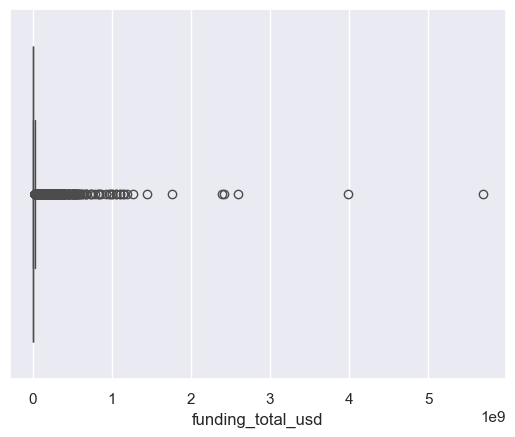

In [22]:

sns.boxplot(x=company["funding_total_usd"])
company.funding_total_usd.describe()

<Axes: xlabel='funding_rounds'>

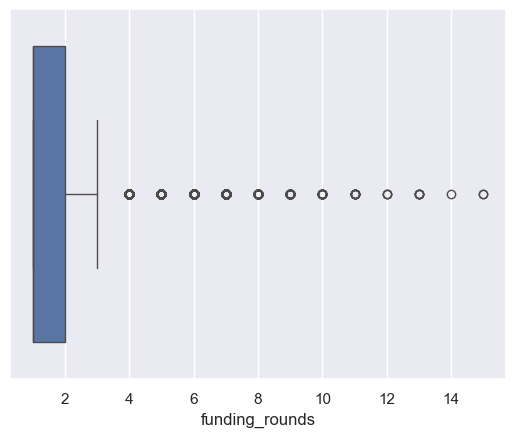

In [23]:
sns.boxplot(x=company["funding_rounds"])

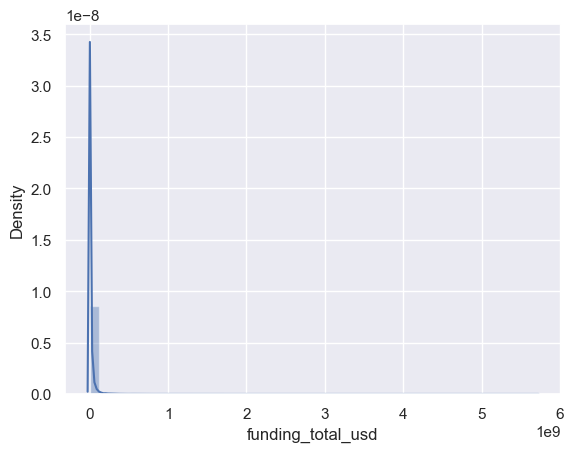

In [24]:
sns.distplot(company['funding_total_usd']) 
plt.show()

In [25]:
# For funding_total_usd

Q1_FTU = company.funding_total_usd.quantile(0.25)
Q3_FTU = company.funding_total_usd.quantile(0.75)
Q1_FTU, Q3_FTU
IQR_FTU = Q3_FTU - Q1_FTU
print(f"IQR of funding_total_usd is: {IQR_FTU}\n")

# For funding_rounds

Q1_FR = company.funding_rounds.quantile(0.25)
Q3_FR = company.funding_rounds.quantile(0.75)
Q1_FR, Q3_FR
IQR_FR = Q3_FR - Q1_FR
print(f"IQR of funding_rounds is: {IQR_FR}")

IQR of funding_total_usd is: 10500000.0

IQR of funding_rounds is: 1.0


In [26]:
# Finding upper and lower limit

# For funding_total_usd
lower_limit_FTU = Q1_FTU - 1.5*IQR_FTU
upper_limit_FTU = Q3_FTU + 1.5*IQR_FTU
print("funding_total_usd")
print(f"lower limit is: {lower_limit_FTU}")
print(f"upper limit is: {upper_limit_FTU}\n")


# For funding_rounds
lower_limit_FR = Q1_FR - 1.5*IQR_FR
upper_limit_FR = Q3_FR + 1.5*IQR_FR
print("funding_total_usd")
print(f"lower limit is: {lower_limit_FR}")
print(f"upper limit is: {upper_limit_FR}")

funding_total_usd
lower limit is: -15250000.0
upper limit is: 26750000.0

funding_total_usd
lower limit is: -0.5
upper limit is: 3.5


In [28]:
# finding outliers
# For funding_total_usd
funding_total_usd_outliers=company[(company.funding_total_usd<lower_limit_FTU)|(company.funding_total_usd>upper_limit_FTU)]
print(funding_total_usd_outliers.shape)

# For funding_rounds
funding_rounds_outliers=company[(company.funding_rounds<lower_limit_FR)|(company.funding_rounds>upper_limit_FR)]
print(funding_rounds_outliers.shape)

(3468, 15)
(2369, 15)


In [29]:
# droping outliers

# For funding_total_usd
company.drop(company[(company.funding_total_usd<lower_limit_FTU)|(company.funding_total_usd>upper_limit_FTU)].index,inplace=True)


# For funding_rounds
company.drop(company[(company.funding_rounds<lower_limit_FR)|(company.funding_rounds>upper_limit_FR)].index,inplace=True)
company.shape

(104015, 15)

<Axes: xlabel='funding_total_usd'>

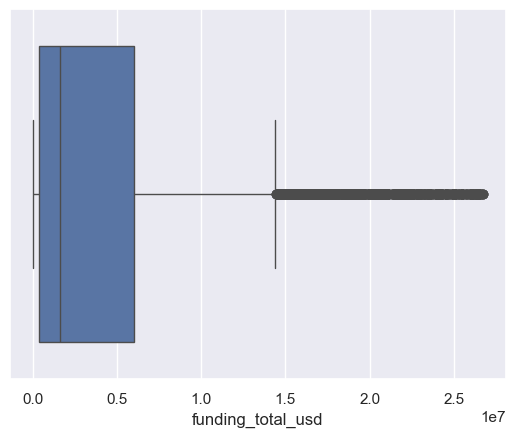

In [30]:
#'funding_total_usd' 
#check outliers for funding_total_usd column
sns.boxplot(x=company["funding_total_usd"])

<Axes: xlabel='funding_rounds'>

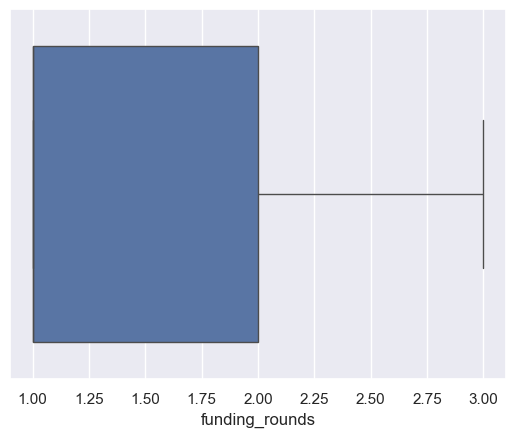

In [31]:

# 'funding_rounds'
#check outliers for funding_rounds column
sns.boxplot(x=company["funding_rounds"])

<Axes: xlabel='relationships'>

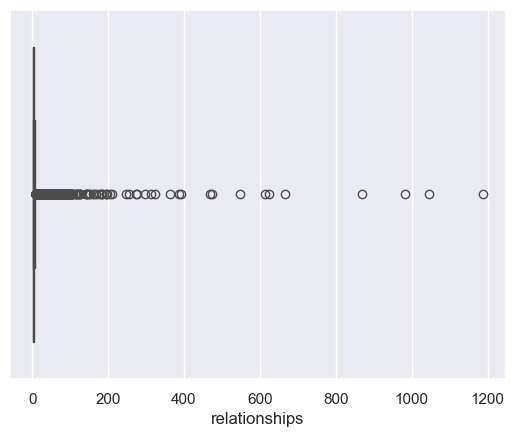

In [32]:
sns.boxplot(x=company["relationships"])

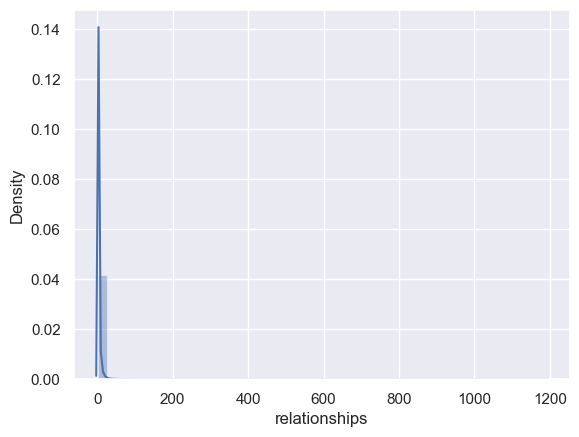

In [33]:
sns.distplot(company['relationships']) 
plt.show()

In [34]:
Q1_relation=company.relationships.quantile(0.25)
Q3_relation=company.relationships.quantile(0.75)
IQR_relation=Q3_relation-Q1_relation
print(f"IQR of funding_total_usd is: {IQR_relation}\n")

IQR of funding_total_usd is: 3.0



In [35]:
# Lower limit and upper limit of the outlier for relationships

lower_limit_relation = Q1_relation - 1.5*IQR_relation
upper_limit_relation = Q3_relation + 1.5*IQR_relation

print(f"lower limit is: {lower_limit_relation}")
print(f"upper limit is: {upper_limit_relation}\n")

lower limit is: -3.5
upper limit is: 8.5



In [36]:
# check outliers for relationships column

company.relationships_outliers=company[(company.relationships<lower_limit_relation)&(company.relationships>upper_limit_relation)]
print(company.shape)
#Drop the outliers
company.drop(company[(company.relationships<lower_limit_relation)|(company.relationships>upper_limit_relation)].index,inplace=True)
print(company.shape)

(104015, 15)
(99413, 15)


1.0    25397
2.0    16643
3.0    10140
4.0     5810
5.0     3430
6.0     2159
7.0     1392
8.0     1043
Name: relationships, dtype: int64

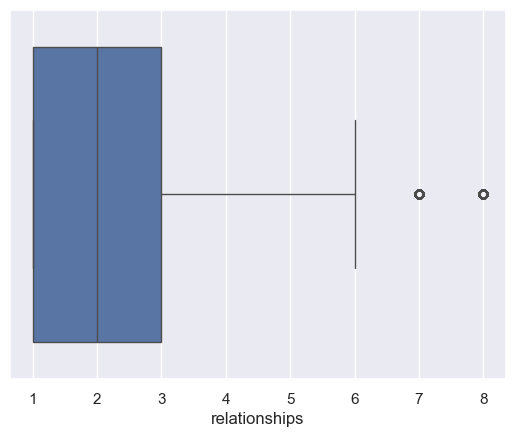

In [37]:
sns.boxplot(x=company["relationships"])
company.relationships.value_counts()

In [38]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99413 entries, 1 to 196552
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   category_code       88813 non-null  object 
 1   status              99413 non-null  object 
 2   founded_at          75157 non-null  object 
 3   closed_at           2384 non-null   object 
 4   country_code        76080 non-null  object 
 5   first_funding_at    24845 non-null  object 
 6   last_funding_at     24845 non-null  object 
 7   funding_rounds      25036 non-null  float64
 8   funding_total_usd   21406 non-null  float64
 9   first_milestone_at  48450 non-null  object 
 10  last_milestone_at   48450 non-null  object 
 11  milestones          48450 non-null  float64
 12  relationships       66014 non-null  float64
 13  lat                 72752 non-null  float64
 14  lng                 72752 non-null  float64
dtypes: float64(6), object(9)
memory usage: 12.1+ MB


In [39]:
 extracting the year data from first_funding_at,last_funding_at,first_milestone_at,last_milestone_at

In [40]:
# "founded_at"

company["founded_at"] = pd.to_datetime(company["founded_at"], format='%Y-%m-%d').dt.year

# "closed_at"

company["closed_at"] = pd.to_datetime(company["closed_at"], format='%Y-%m-%d').dt.year

# "first_funding_at"

company["first_funding_at"] = pd.to_datetime(company["first_funding_at"], format='%Y-%m-%d').dt.year

# "last_funding_at"

company["last_funding_at"] = pd.to_datetime(company["last_funding_at"], format='%Y-%m-%d').dt.year

# "first_milestone_at"

company["first_milestone_at"] = pd.to_datetime(company["first_milestone_at"], format='%Y-%m-%d').dt.year

#"last_milestone_at"

company["last_milestone_at"] = pd.to_datetime(company["last_milestone_at"], format='%Y-%m-%d').dt.year

In [41]:
company.dtypes

category_code          object
status                 object
founded_at            float64
closed_at             float64
country_code           object
first_funding_at      float64
last_funding_at       float64
funding_rounds        float64
funding_total_usd     float64
first_milestone_at    float64
last_milestone_at     float64
milestones            float64
relationships         float64
lat                   float64
lng                   float64
dtype: object

In [42]:
# applying imputaion

company["category_code"].unique()

array(['games_video', 'network_hosting', 'advertising', 'cleantech', nan,
       'enterprise', 'other', 'consulting', 'software', 'web', 'mobile',
       'finance', 'education', 'medical', 'manufacturing', 'biotech',
       'ecommerce', 'public_relations', 'hardware', 'search', 'analytics',
       'news', 'government', 'security', 'photo_video', 'travel',
       'health', 'semiconductor', 'social', 'legal', 'transportation',
       'hospitality', 'sports', 'nonprofit', 'fashion', 'messaging',
       'music', 'design', 'real_estate', 'local', 'automotive', 'pets',
       'nanotech'], dtype=object)

In [43]:

company["category_code"].isnull().sum()

10600

In [44]:
((company["category_code"].isnull().sum())/(company["category_code"].size))*100

10.662589399776689

In [45]:
mode_value=company["category_code"].mode()
mode_value[0]

'software'

In [46]:
company["category_code"].fillna(mode_value[0],inplace=True)
company["category_code"].isna().sum() 

0

In [47]:
# Target variable
company["status"].unique()

array(['acquired', 'operating', 'closed', 'ipo'], dtype=object)

In [48]:
## "category_code"

company["category_code"].unique()

array(['games_video', 'network_hosting', 'advertising', 'cleantech',
       'software', 'enterprise', 'other', 'consulting', 'web', 'mobile',
       'finance', 'education', 'medical', 'manufacturing', 'biotech',
       'ecommerce', 'public_relations', 'hardware', 'search', 'analytics',
       'news', 'government', 'security', 'photo_video', 'travel',
       'health', 'semiconductor', 'social', 'legal', 'transportation',
       'hospitality', 'sports', 'nonprofit', 'fashion', 'messaging',
       'music', 'design', 'real_estate', 'local', 'automotive', 'pets',
       'nanotech'], dtype=object)

In [49]:
company.category_code.value_counts()

software            24852
web                 11362
other                8220
ecommerce            6896
mobile               5064
advertising          4707
games_video          4399
consulting           3993
biotech              3342
enterprise           3224
public_relations     2387
hardware             2355
education            1896
network_hosting      1891
search               1570
cleantech            1411
health               1000
social                962
finance               937
security              905
analytics             803
legal                 680
medical               665
travel                548
manufacturing         533
semiconductor         509
news                  477
hospitality           471
fashion               453
local                 439
real_estate           366
photo_video           325
music                 290
sports                281
messaging             247
transportation        244
design                221
automotive            186
nonprofit   

In [50]:

#category_encoding
category_others_index = company.category_code.value_counts()[15:].index
company['category_code'] = company['category_code'].replace(to_replace=category_others_index,value='other')

In [51]:
# Let's check if we've more than 15 columns
print('Unique no of category_code : ',company['category_code'].nunique())
company.category_code.value_counts()

Unique no of category_code :  15


software            24852
other               21475
web                 11362
ecommerce            6896
mobile               5064
advertising          4707
games_video          4399
consulting           3993
biotech              3342
enterprise           3224
public_relations     2387
hardware             2355
education            1896
network_hosting      1891
search               1570
Name: category_code, dtype: int64

In [52]:
#  Encoding Country column

company.country_code.unique()

array(['USA', nan, 'MAR', 'IND', 'AUS', 'FRA', 'JPN', 'NLD', 'EGY', 'ISR',
       'GBR', 'THA', 'CAN', 'AUT', 'IRL', 'SWE', 'DEU', 'BRA', 'FIN',
       'RUS', 'SGP', 'MEX', 'CHN', 'ESP', 'ISL', 'KOR', 'TUR', 'DNK',
       'ARG', 'PAK', 'HUN', 'POL', 'GRC', 'PRT', 'BLR', 'CSS', 'MKD',
       'CHE', 'SVN', 'UKR', 'ITA', 'NZL', 'LIE', 'NOR', 'CZE', 'VNM',
       'HRV', 'BEN', 'CHL', 'GHA', 'ZAF', 'MYS', 'EST', 'BEL', 'SVK',
       'TWN', 'CRI', 'HKG', 'BGD', 'BOL', 'LBN', 'LUX', 'AZE', 'COL',
       'PHL', 'ARE', 'IDN', 'ROM', 'ANT', 'CYM', 'NGA', 'GIN', 'CYP',
       'LKA', 'SWZ', 'VGB', 'MLT', 'SAU', 'KEN', 'BGR', 'PER', 'LVA',
       'LAO', 'NPL', 'MDA', 'CMR', 'UGA', 'TUN', 'URY', 'MUS', 'VEN',
       'OMN', 'ECU', 'KWT', 'JOR', 'LTU', 'ALB', 'QAT', 'UMI', 'PST',
       'REU', 'GTM', 'PCN', 'BHS', 'GEO', 'BWA', 'DZA', 'GRD', 'ZMB',
       'GIB', 'PAN', 'MTQ', 'PRI', 'BIH', 'DMA', 'BHR', 'SYC', 'SLE',
       'TTO', 'VCT', 'ARA', 'BRB', 'NAM', 'SLV', 'AFG', 'BLZ', 'UZB',
       'IRN', '

In [53]:
# Lets keep the country as same of it falls under above 10 otherwise let's replaceit with other.
country_code_others_index = company['country_code'].value_counts()[9:].index
company['country_code'] = company['country_code'].replace(to_replace=country_code_others_index,value='other')

In [54]:

# Let's check if we've more than 10 columns
print('Unique no of country_code : ',company['country_code'].nunique())
company.country_code.value_counts()

Unique no of country_code :  10


USA      43012
other    12915
GBR       6518
IND       3591
CAN       3346
DEU       1780
FRA       1556
AUS       1371
ESP       1050
ISR        941
Name: country_code, dtype: int64

In [55]:
company["country_code"].isnull().sum()

23333

In [56]:
((company["country_code"].isnull().sum())/(company["country_code"].size))*100 

23.47077344009335

In [57]:
mode_val_1=company["country_code"].mode()
mode_val_1[0]

'USA'

In [58]:
company["country_code"].fillna(mode_val_1[0],inplace=True)

In [59]:
## Numerical columns

In [60]:
num_columns=company.select_dtypes(include=['int','float']).columns
num_columns

Index(['founded_at', 'closed_at', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'lat', 'lng'],
      dtype='object')

In [61]:
## "founded_at"

company["founded_at"].isnull().sum()

24256

In [62]:
((company["founded_at"].isnull().sum())/(company["founded_at"].size))*100

24.399223441602206

In [63]:
## less than 30% missing values

#hence let's impute with the median value of this column

med=company["founded_at"].mode()
med[0]

2011.0

In [64]:
company["founded_at"].fillna(med[0],inplace=True)
company["founded_at"].isnull().sum()

0

In [65]:

## "closed_at"

company["closed_at"].isnull().sum()

97029

In [66]:
company["closed_at"].unique()

array([  nan, 2010., 2011., 2012., 2013., 2009., 2007., 2008., 2006.,
       2014., 2001., 2003., 2004., 1963., 2002., 1991., 2005., 1998.,
       1986., 1997., 2000.])

In [67]:
((company["closed_at"].isnull().sum())/(company["closed_at"].size))*100      

97.6019232897106

In [68]:
## "first_funding_at"

company["first_funding_at"].isnull().sum()

74568

In [69]:
company["first_funding_at"].size

99413

In [70]:
((company["first_funding_at"].isnull().sum())/(company["first_funding_at"].size))*100

75.00829871344794

In [71]:
# "last_funding_at"

company["last_funding_at"].isnull().sum()

74568

In [72]:
company["last_funding_at"].size

99413

In [73]:

((company["last_funding_at"].isnull().sum())/(company["last_funding_at"].size))*100

75.00829871344794

In [74]:
# replace the nan value with its "mean" value

company["funding_rounds"].fillna(company["funding_rounds"].mean(),inplace=True)

company["funding_total_usd"].fillna(company["funding_total_usd"].mean(),inplace=True)

company["milestones"].fillna(company["milestones"].mean(),inplace=True)

company["first_milestone_at"].fillna(company["first_milestone_at"].mean(),inplace=True)


company["last_milestone_at"].fillna(company["last_milestone_at"].mean(),inplace=True)

company["first_funding_at"].fillna(company["first_funding_at"].mean(),inplace=True)

company["last_funding_at"].fillna(company["last_funding_at"].mean(),inplace=True)

company["relationships"].fillna(company["relationships"].mean(),inplace=True)

company["lat"].fillna(company["lat"].mean(),inplace=True)

company["lng"].fillna(company["lng"].mean(),inplace=True)

In [75]:
company.columns

Index(['category_code', 'status', 'founded_at', 'closed_at', 'country_code',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'lat', 'lng'],
      dtype='object')

In [77]:
df.head()

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
1,games_video,acquired,2011.0,NaN,USA,2010.357698,2010.745623,1.310153,3.859288e+06,2008.939794,2009.401837,1.232714,6.000000,34.021122,-118.396467
3,network_hosting,operating,2008.0,NaN,USA,2010.357698,2010.745623,1.310153,3.859288e+06,2008.939794,2009.401837,1.232714,2.431833,37.376781,-49.246564
4,games_video,operating,2008.0,NaN,USA,2010.357698,2010.745623,1.310153,3.859288e+06,2008.939794,2009.401837,1.232714,2.431833,37.376781,-49.246564
5,advertising,operating,2007.0,NaN,other,2010.357698,2010.745623,1.310153,3.859288e+06,2008.939794,2009.401837,1.232714,2.000000,30.427755,-9.598107
6,other,operating,2008.0,NaN,IND,2010.357698,2010.745623,1.310153,3.859288e+06,2008.939794,2009.401837,1.232714,2.431833,22.307159,73.181219


In [78]:
# I assign 'operating' or 'ipo' as 'operating' and 'closed' or 'acquired' as 'acquired'

def isClosed(row):
    if row['status'] == 'operating' or row['status'] == 'ipo':
        return 0
    else:
        return 1
company['isClosed'] = company.apply(lambda rw: isClosed(rw),axis=1)
company

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed
1,games_video,acquired,2011.0,NaN,USA,2010.357698,2010.745623,1.310153,3.859288e+06,2008.939794,2009.401837,1.232714,6.000000,34.021122,-118.396467,1
3,network_hosting,operating,2008.0,NaN,USA,2010.357698,2010.745623,1.310153,3.859288e+06,2008.939794,2009.401837,1.232714,2.431833,37.376781,-49.246564,0
4,games_video,operating,2008.0,NaN,USA,2010.357698,2010.745623,1.310153,3.859288e+06,2008.939794,2009.401837,1.232714,2.431833,37.376781,-49.246564,0
5,advertising,operating,2007.0,NaN,other,2010.357698,2010.745623,1.310153,3.859288e+06,2008.939794,2009.401837,1.232714,2.000000,30.427755,-9.598107,0
6,other,operating,2008.0,NaN,IND,2010.357698,2010.745623,1.310153,3.859288e+06,2008.939794,2009.401837,1.232714,2.431833,22.307159,73.181219,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196545,software,operating,2004.0,NaN,USA,2010.357698,2010.745623,1.310153,3.859288e+06,2008.939794,2009.401837,1.232714,2.431833,40.748350,-74.323219,0
196547,advertising,operating,2008.0,NaN,USA,2007.000000,2008.000000,2.000000,5.000000e+05,2009.000000,2009.000000,1.000000,2.000000,37.376781,-49.246564,0
196548,ecommerce,operating,2007.0,NaN,USA,2010.357698,2010.745623,1.310153,3.859288e+06,2013.000000,2013.000000,2.000000,5.000000,37.774929,-122.419415,0
196551,search,operating,2008.0,NaN,USA,2010.357698,2010.745623,1.310153,3.859288e+06,2008.939794,2009.401837,1.232714,1.000000,34.052234,-118.243685,0


In [79]:
#Replacing the values in closed_at column
#if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
 #Where as if the value is 'acquired' or 'closed', let's put 0.

company['closed_at']=(np.where((company['status']=='operating')|(company['status']=='ipo'),2021,company['closed_at']))

company['closed_at']=(np.where((company['status']=='acquired')|(company['status']=='closed'),0,company['closed_at']))

In [80]:

company.isClosed.value_counts()

0    90948
1     8465
Name: isClosed, dtype: int64

In [81]:

company['status'] = company['status'].replace(['operating', 'ipo'],'operating')

company['status'] = company['status'].replace(['closed', 'acquired'],'acquired')

In [82]:

company.status.value_counts()

operating    90948
acquired      8465
Name: status, dtype: int64

In [84]:
# Create active days

#Subtract founded_date from closed_date, and calculate age in days (After calculating active days,then delete the closed_at column)


company['active_days'] = (company['closed_at'] - company['founded_at'])*365
company["active_days"]

company.head()

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days
1,games_video,acquired,2011.0,0.0,USA,2010.357698,2010.745623,1.310153,3.859288e+06,2008.939794,2009.401837,1.232714,6.000000,34.021122,-118.396467,1,-734015.0
3,network_hosting,operating,2008.0,2021.0,USA,2010.357698,2010.745623,1.310153,3.859288e+06,2008.939794,2009.401837,1.232714,2.431833,37.376781,-49.246564,0,4745.0
4,games_video,operating,2008.0,2021.0,USA,2010.357698,2010.745623,1.310153,3.859288e+06,2008.939794,2009.401837,1.232714,2.431833,37.376781,-49.246564,0,4745.0
5,advertising,operating,2007.0,2021.0,other,2010.357698,2010.745623,1.310153,3.859288e+06,2008.939794,2009.401837,1.232714,2.000000,30.427755,-9.598107,0,5110.0
6,other,operating,2008.0,2021.0,IND,2010.357698,2010.745623,1.310153,3.859288e+06,2008.939794,2009.401837,1.232714,2.431833,22.307159,73.181219,0,4745.0


In [85]:
# drop closed_at column
company.drop(["closed_at"],axis=1)

,category_code,status,founded_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days
1,games_video,acquired,2011.0,USA,2010.357698,2010.745623,1.310153,3.859288e+06,2008.939794,2009.401837,1.232714,6.000000,34.021122,-118.396467,1,-734015.0
3,network_hosting,operating,2008.0,USA,2010.357698,2010.745623,1.310153,3.859288e+06,2008.939794,2009.401837,1.232714,2.431833,37.376781,-49.246564,0,4745.0
4,games_video,operating,2008.0,USA,2010.357698,2010.745623,1.310153,3.859288e+06,2008.939794,2009.401837,1.232714,2.431833,37.376781,-49.246564,0,4745.0
5,advertising,operating,2007.0,other,2010.357698,2010.745623,1.310153,3.859288e+06,2008.939794,2009.401837,1.232714,2.000000,30.427755,-9.598107,0,5110.0
6,other,operating,2008.0,IND,2010.357698,2010.745623,1.310153,3.859288e+06,2008.939794,2009.401837,1.232714,2.431833,22.307159,73.181219,0,4745.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196545,software,operating,2004.0,USA,2010.357698,2010.745623,1.310153,3.859288e+06,2008.939794,2009.401837,1.232714,2.431833,40.748350,-74.323219,0,6205.0
196547,advertising,operating,2008.0,USA,2007.000000,2008.000000,2.000000,5.000000e+05,2009.000000,2009.000000,1.000000,2.000000,37.376781,-49.246564,0,4745.0
196548,ecommerce,operating,2007.0,USA,2010.357698,2010.745623,1.310153,3.859288e+06,2013.000000,2013.000000,2.000000,5.000000,37.774929,-122.419415,0,5110.0
196551,search,operating,2008.0,USA,2010.357698,2010.745623,1.310153,3.859288e+06,2008.939794,2009.401837,1.232714,1.000000,34.052234,-118.243685,0,4745.0


In [86]:
company.shape

(99413, 17)

In [87]:
#performing EDA



In [88]:
df.describe()

,founded_at,closed_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days
count,99413.000000,99413.000000,99413.000000,99413.000000,99413.000000,9.941300e+04,99413.000000,99413.000000,99413.000000,99413.000000,99413.000000,99413.000000,99413.000000,99413.000000
mean,2007.077897,1848.912195,2010.357698,2010.745623,1.310153,3.859288e+06,2008.939794,2009.401837,1.232714,2.431833,37.376781,-49.246564,0.085150,-57730.481476
std,8.817797,564.073083,1.326290,1.266878,0.290833,2.518345e+06,3.459376,3.379600,0.364628,1.361317,13.689476,60.566705,0.279106,205753.241087
min,1901.000000,0.000000,1960.000000,1960.000000,1.000000,2.910000e+02,1960.000000,1960.000000,1.000000,1.000000,-50.942326,-159.497746,0.000000,-734745.000000
25%,2006.000000,2021.000000,2010.357698,2010.745623,1.310153,3.859288e+06,2008.939794,2009.401837,1.000000,1.000000,37.354108,-87.988954,0.000000,3650.000000
50%,2010.000000,2021.000000,2010.357698,2010.745623,1.310153,3.859288e+06,2008.939794,2009.401837,1.232714,2.431833,37.376781,-49.246564,0.000000,3650.000000
75%,2011.000000,2021.000000,2010.357698,2010.745623,1.310153,3.859288e+06,2010.000000,2011.000000,1.232714,2.431833,42.175617,-3.703790,0.000000,5110.000000
max,2014.000000,2021.000000,2013.000000,2013.000000,3.000000,2.670000e+07,2014.000000,2014.000000,7.000000,8.000000,77.553604,176.212549,1.000000,43800.000000


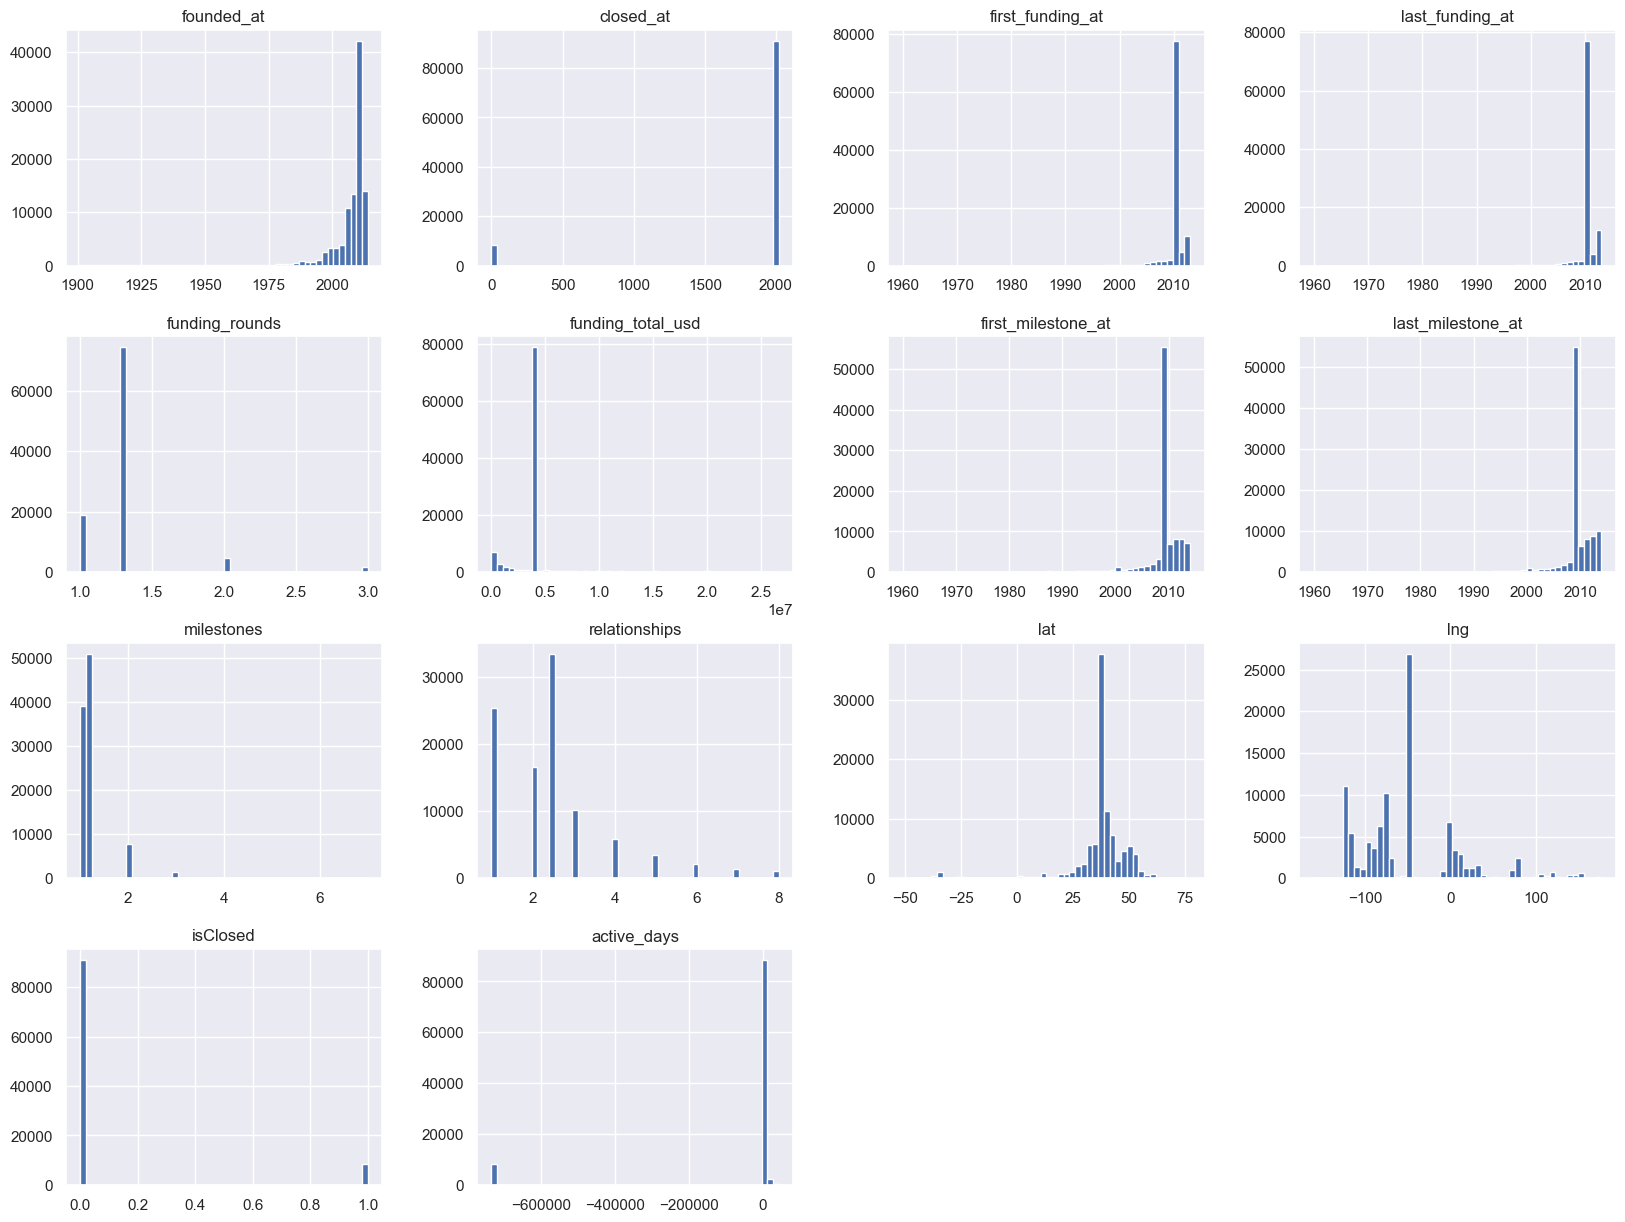

In [89]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

0    90948
1     8465
Name: isClosed, dtype: int64


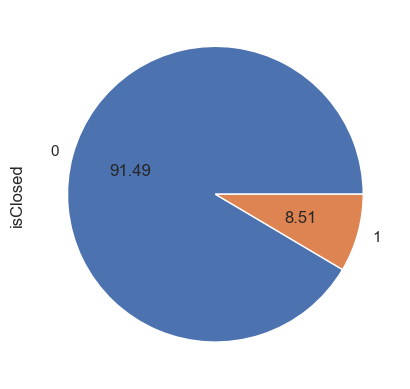

In [91]:
# univariate analysis

print(company.isClosed.value_counts())
company['isClosed'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

In [92]:
# 91% are not closed

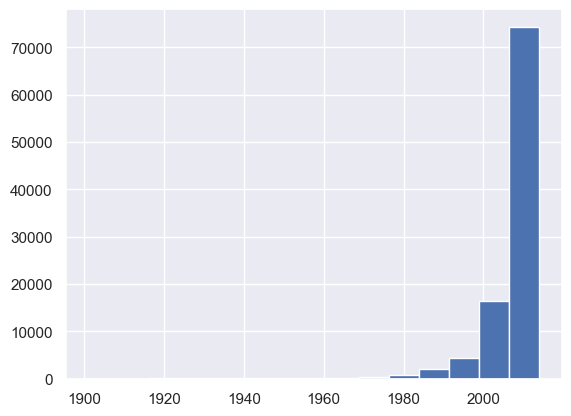

In [93]:
plt.hist(company['founded_at'], bins=15)
plt.show()

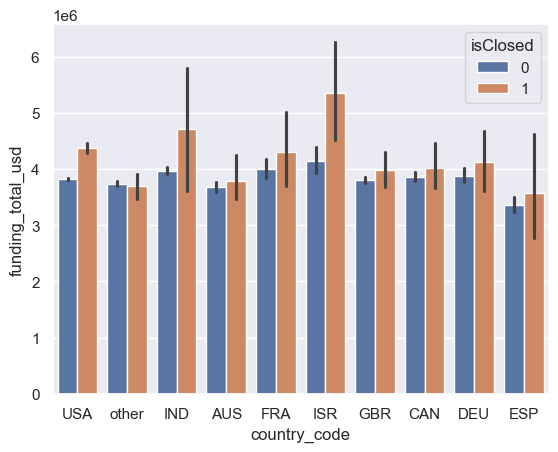

In [96]:
sns.barplot(x=company['country_code'], y=company['funding_total_usd'], hue=company['isClosed'])
plt.show()

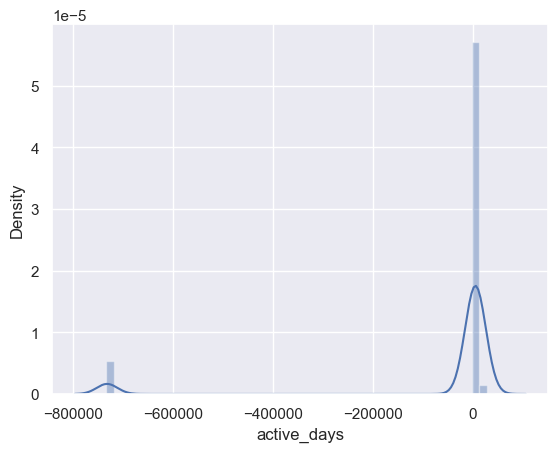

In [97]:
sns.distplot(company['active_days']) 
plt.show()

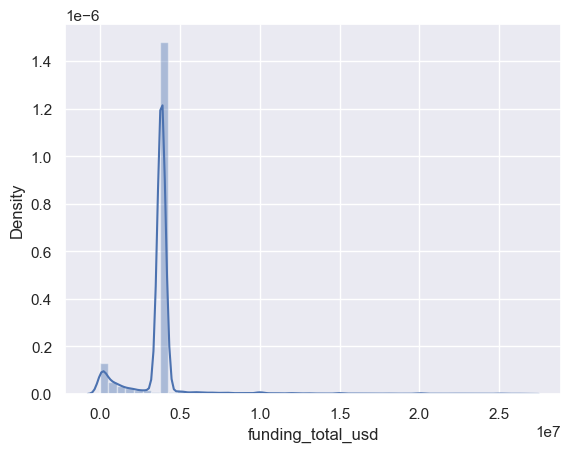

In [98]:
sns.distplot(company['funding_total_usd']) 
plt.show()

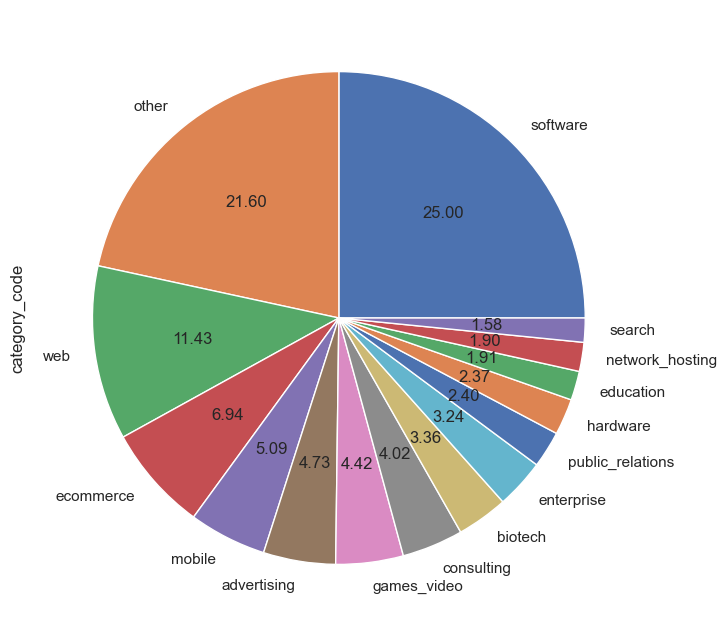

In [99]:
fig, ax = plt.subplots(figsize=(8, 8))
company['category_code'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

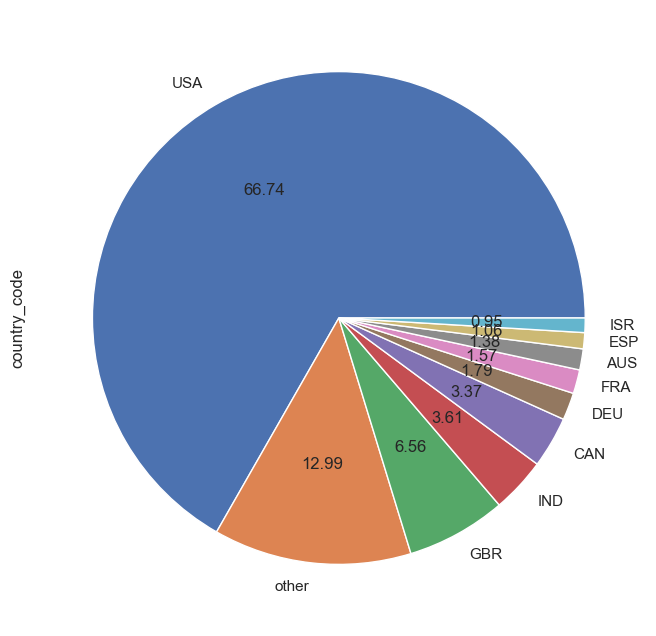

In [100]:
fig, ax = plt.subplots(figsize=(8, 8))
company['country_code'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

In [101]:
!pip install plotly

You should consider upgrading via the 'C:\Users\SUMIT\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [103]:
fig = px.scatter(company, x='country_code', size=company['country_code'].value_counts(), 
                 size_max=50, title='Packed Bubble Chart - Country Code Distribution')

fig.update_layout(showlegend=False)  # Hide the legend for simplicity

fig.show()

ValueError: All arguments should have the same length. The length of argument `size` is 10, whereas the length of  previously-processed arguments ['country_code', 'index'] is 99413